In [49]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from __future__ import division
from sklearn import linear_model
import numpy as np
mpl.rc('savefig', dpi=100)
plt.style.use('ggplot')

In [50]:
# read the raw data and see what it looks like
data = pd.read_csv("student-mat.csv").dropna()
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [51]:
# show basic statistic imformation of the data
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [52]:
# Implement a random forest
import csv
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from collections import Counter
import numpy as np
import scipy.io
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt

rawdata=pd.read_csv("student-mat.csv").dropna()

In [53]:
# remove the score from the data
x_rawdata=rawdata.drop('G1', 1)
x_rawdata=x_rawdata.drop('G2', 1)
x_rawdata=x_rawdata.drop('G3', 1)

In [54]:
# transform binary string value "yes" or no"  into "1" or "0"
for rows in list(x_rawdata.columns.values):
    for item in list(x_rawdata.index):
        if x_rawdata[rows][item]=='yes'or x_rawdata[rows][item]=='F':
            x_rawdata.set_value(item,rows,1)
        elif x_rawdata[rows][item]=='no' or x_rawdata[rows][item]=='M':
            x_rawdata.set_value(item,rows,-1)

In [55]:
# use one-hot method to transfer categorical item into binary output
x_dic=x_rawdata.to_dict(orient='index')
x_list=[x_dic[i]for i in range(len(x_dic))]
vec = DictVectorizer()
x_train=vec.fit_transform(x_list).toarray()

In [56]:
# save features name
name=vec.get_feature_names()

In [57]:
# use average of three tests as output
y_train=((rawdata['G1']+rawdata['G2']+rawdata['G3'])/3//1).tolist()
# build random forest using sklearn
clf = RandomForestClassifier(max_features=6,max_depth=10)
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

0.95949367088607596

In [58]:
#extract the most affecting features and sort it
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [59]:
# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, name[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature absences (0.065364)
2. feature Medu (0.053294)
3. feature Fedu (0.045245)
4. feature freetime (0.043655)
5. feature goout (0.038739)
6. feature Walc (0.038521)
7. feature age (0.038511)
8. feature health (0.038385)
9. feature studytime (0.036000)
10. feature famrel (0.032404)
11. feature reason=reputation (0.027801)
12. feature activities (0.027482)
13. feature traveltime (0.027368)
14. feature failures (0.023961)
15. feature Mjob=other (0.021821)
16. feature famsize=GT3 (0.021549)
17. feature Fjob=other (0.021049)
18. feature romantic (0.020581)
19. feature reason=home (0.020266)
20. feature paid (0.017941)
21. feature sex (0.017791)
22. feature reason=course (0.017292)
23. feature address=U (0.016713)
24. feature internet (0.015480)
25. feature Dalc (0.015237)
26. feature address=R (0.015040)
27. feature guardian=mother (0.014958)
28. feature famsize=LE3 (0.014333)
29. feature Mjob=health (0.014240)
30. feature guardian=father (0.013957)
31. feature famsup

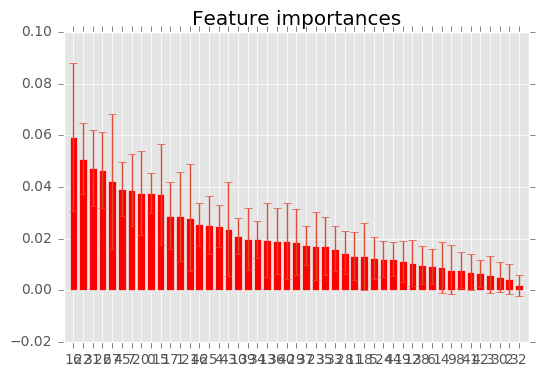

In [33]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

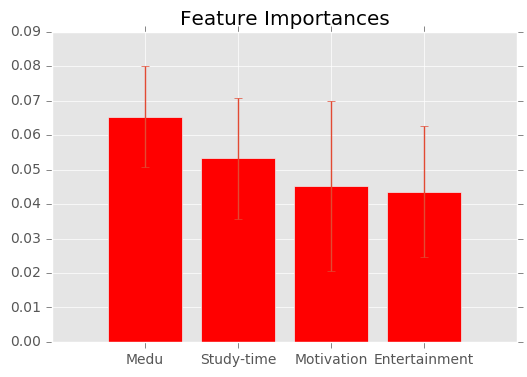

In [64]:
# pick up top 4 factors and label the names of features.
plt.figure()
plt.title("Feature Importances")
plt.bar(range(4), importances[indices[:4]],
       color="r", yerr=std[indices[:4]], align="center")
plt.xticks(range(4), ['Medu','Study-time','Motivation','Entertainment'])
plt.xlim([-1, 4])
plt.show()

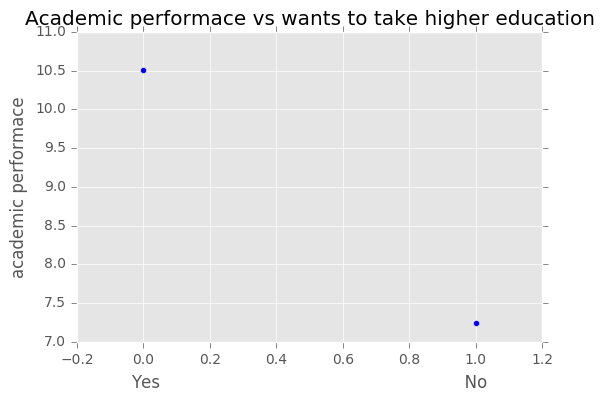

In [43]:
## The relationship between Academic Performance and pursuing higher education
scorelist=[0,1]
Score=[data[data["higher"]=='yes']["Ave_score"].mean(),data[data["higher"]=='no']["Ave_score"].mean()]
plt.scatter(scorelist,Score)
plt.title("Academic performace vs wants to take higher education")
plt.xlabel("Yes                                                          No")
plt.ylabel("academic performace")

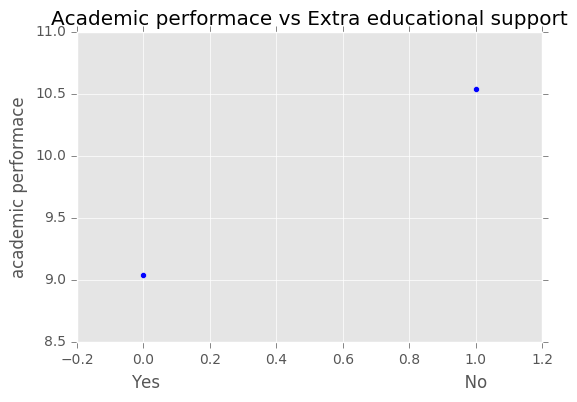

In [46]:
## The relationship between Academic Performance and Extra educational support
scorelist=[0,1]
Score=[data[data["schoolsup"]=='yes']["Ave_score"].mean(),data[data["schoolsup"]=='no']["Ave_score"].mean()]
plt.scatter(scorelist,Score)
plt.title("Academic performace vs Extra educational support")
plt.xlabel("Yes                                                          No")
plt.ylabel("academic performace")

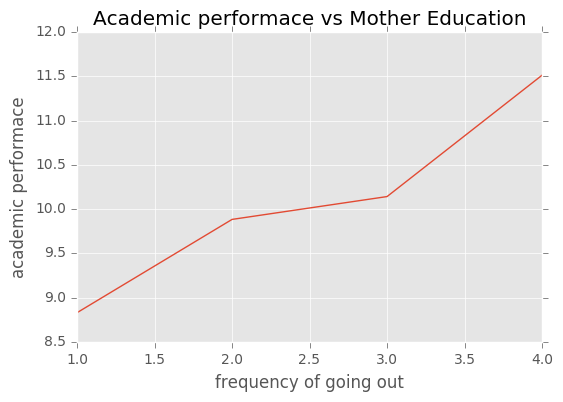

In [20]:
## The relationship between Academic Performance and Mother's education level
scorelist=[1,2,3,4,5]
Score=[data[data["Medu"]==i]["Ave_score"].mean() for i in scorelist]
plt.plot(scorelist,Score)
plt.title("Academic performace vs Mother Education")
plt.xlabel("frequency of going out")
plt.ylabel("academic performace")

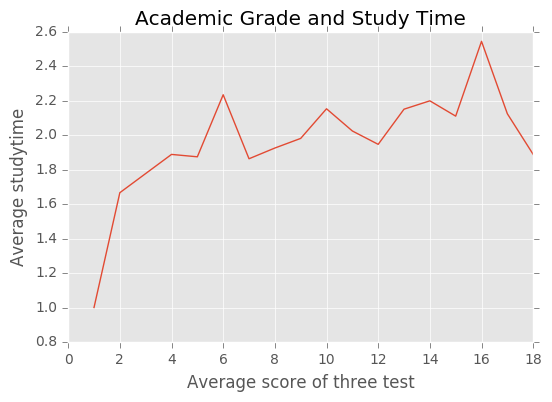

In [21]:
# The relationship between Academic Performance and Study Time
data["Ave_score"]=(data["G1"]+data["G2"]+data["G3"])/3//1
axis_y=np.array([data[data["Ave_score"]==0]["studytime"].mean(),data[data["Ave_score"]==1]["studytime"].mean(),
                data[data["Ave_score"]==2]["studytime"].mean(),data[data["Ave_score"]==3]["studytime"].mean()
               ,data[data["Ave_score"]==4]["studytime"].mean(),data[data["Ave_score"]==5]["studytime"].mean()
                ,data[data["Ave_score"]==6]["studytime"].mean(),data[data["Ave_score"]==7]["studytime"].mean()
                ,data[data["Ave_score"]==8]["studytime"].mean(),data[data["Ave_score"]==9]["studytime"].mean()
                ,data[data["Ave_score"]==10]["studytime"].mean(),data[data["Ave_score"]==11]["studytime"].mean()
                ,data[data["Ave_score"]==12]["studytime"].mean(),data[data["Ave_score"]==13]["studytime"].mean()
                ,data[data["Ave_score"]==14]["studytime"].mean(),data[data["Ave_score"]==15]["studytime"].mean()
                ,data[data["Ave_score"]==16]["studytime"].mean(),data[data["Ave_score"]==17]["studytime"].mean()
                ,data[data["Ave_score"]==18]["studytime"].mean()
                ])
plt.plot(np.arange(0,19),axis_y)
plt.title("Academic Grade and Study Time")
plt.xlabel("Average score of three test")
plt.ylabel("Average studytime")

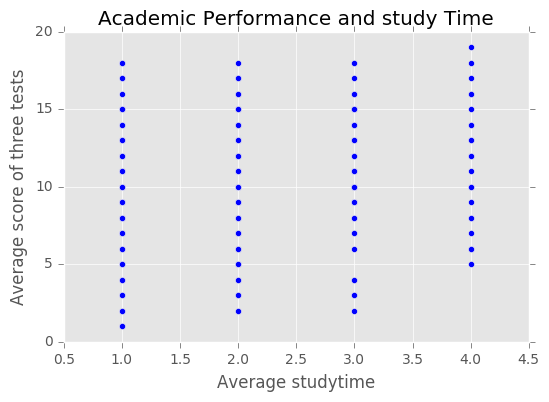

In [24]:
plt.scatter(data.studytime, data.Ave_score, label='Data')
plt.title("Academic Performance and study Time")
plt.xlabel("Average studytime")
plt.ylabel("Average score of three tests")

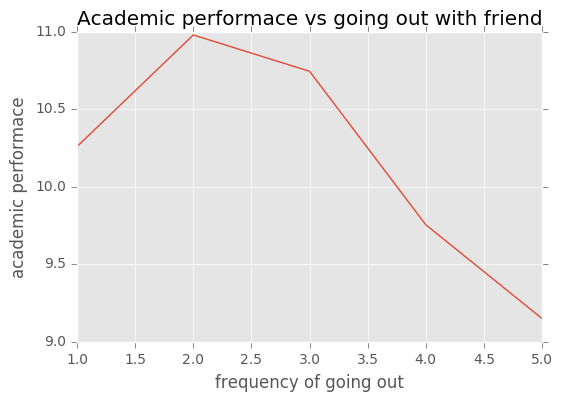

In [44]:
# The relationship between Academic Performance and frequency of going of with friend
scorelist=[1,2,3,4,5]
Score=[data[data["goout"]==i]["Ave_score"].mean() for i in scorelist]
plt.plot(scorelist,Score)
plt.title("Academic performace vs going out with friend")
plt.xlabel("frequency of going out")
plt.ylabel("academic performace")

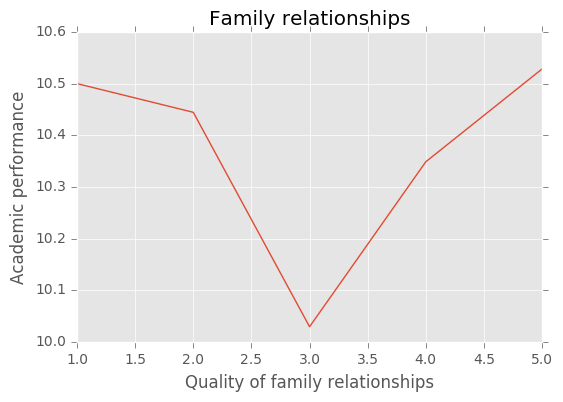

In [5]:
# relationship between quality of family relationships and academic performance
project_bins = pd.cut(data["famrel"], 5)
project_bins.cat.categories
data_grouped_by_pbin = data.groupby(project_bins)
plt.plot(data_grouped_by_pbin["famrel"].mean(),
         data_grouped_by_pbin["Ave_score"].mean()
            )
plt.title("Family relationships")
plt.xlabel("Quality of family relationships")
plt.ylabel("Academic performance")
plt.show()

In [6]:
#Average score of students who take extra classes within the course subject yes or no
[data[data["higher"]=="yes"]["Ave_score"].mean(),data[data["higher"]=="no"]["Ave_score"].mean()]

[10.514666666666667, 7.25]

In [9]:
# Let's check out the RSS of linear regression(linear combination of failures and Medu)
data_gp=data
X_train=np.array([data_gp["failures"].tolist(),data_gp["Medu"].tolist()]).transpose()
y_train=np.array(data_gp["Ave_score"].tolist())
lreg=linear_model.LinearRegression()
lreg.fit(X_train, y_train,sample_weight=None)
lreg.score(X_train, y_train)

0.16198333775715057